# Home Work 3

Author: Wenqi Hu, Shanshan Liu

## Load necessary packages 

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

## Define Golbal Variable

In [2]:
lambd=0.001
repeat=1000
os.chdir(r'G:\Users\Hu Wenqi\Dropbox\Machine Learning Data\binary\ ')

### defien normalization

In [3]:
def norm(X,Y):
    norm_X=(X-np.mean(X))/np.std(X)
    return norm_X,(Y+1)/2

### define a function that make read data steap easier

In [4]:
def read_file(name):
    train_X=pd.read_csv(name+'_train.data',sep=' ',header=None)
    train_Y=pd.read_csv(name+'_train.labels',header=None).iloc[:,0]
    valid_X=pd.read_csv(name+'_valid.data',sep=' ',header=None)
    valid_Y=pd.read_csv(name+'_valid.labels',header=None).iloc[:,0]
    train_X=np.array(train_X.iloc[:,:-1])
    valid_X=np.array(valid_X.iloc[:,:-1])
    train_X_N,train_Y_N=norm(train_X,train_Y)
    valid_X_N,valid_Y_N=norm(valid_X,valid_Y)
    return train_X_N,train_Y_N,valid_X_N,valid_Y_N


## Building Model

 ### initiallize parameters

In [5]:
def initiallize(X):
    n_x,m=X.shape
    W=np.zeros([1,m])
    b=0
    parameters={}
    parameters['W']=W
    parameters['b']=b
    return parameters


### Calculate forward step and get A(y_hat)

In [6]:
def forward(X,parameters):
    W=parameters['W']
    b=parameters['b']
    Z=-np.dot(W,X.T)+b
    A=1/(1+np.exp(-Z))
    return A[0,:]

### Calculate backward step and get dw, db

In [7]:
def backward(X,A,Y,parameters,lambd):
    n_x,m=X.shape
    W=parameters['W']
    dZ=A-Y
    dW=(1/m)*np.dot(X.T,dZ.T)-lambd*W
    db=(1/m)*np.sum(dZ)
    grads={}
    grads['dW']=dW
    grads['db']=db
    return grads


### Calculate log likely hood L

In [8]:
def calcul_Cond_Likelihood(X,Y,parameters):
    W=parameters['W']
    b=parameters['b']
    Z=-np.dot(W,X.T)+b
    Z=Z[0,:]
    L=sum(Y*Z-np.log(1+np.exp(Z)))
    return L

### Updata W and b 

In [9]:
def update_parameters(X,Y,repeat,learning_rate,lambd):
    n_x,m=X.shape
    parameters=initiallize(X)
    L_coll=[]
    for i in range(1,repeat):
        temp_W,temp_b=parameters['W'],parameters['b']
        A=forward(X,parameters)
        grads=backward(X,A,Y,parameters,lambd)
        parameters['W']=temp_W+(learning_rate)*grads['dW']
        parameters['b']=temp_b+(learning_rate)*grads['db']
        if i>300:
            L= calcul_Cond_Likelihood(X,Y,parameters)
            if i%10==0:
                L_coll.append(L)
    return parameters,L_coll

### Calculate and output Y_hat and error_rate

In [10]:
def prediction(parameter,X,Y):
    A=forward(X,parameter)
    Y_hat=A>0.5
    return Y_hat,sum(abs(Y_hat-Y))/Y.shape[0]

### Define a function to plot the result 

In [11]:
def plot_result(L_coll):
    loss=pd.Series(L_coll)
    loss.index=(loss.index+1)*10
    plt.figure(figsize=(16,9))  
    plt.plot(loss)
    plt.title('log-likelihood vs iteration number')
    plt.xlabel('log-likelihood')
    plt.ylabel('iteration number')
    plt.show()

## Apply Model to Data Set

### Gisette

training_err      0.000
prediction_err    0.026
dtype: float64


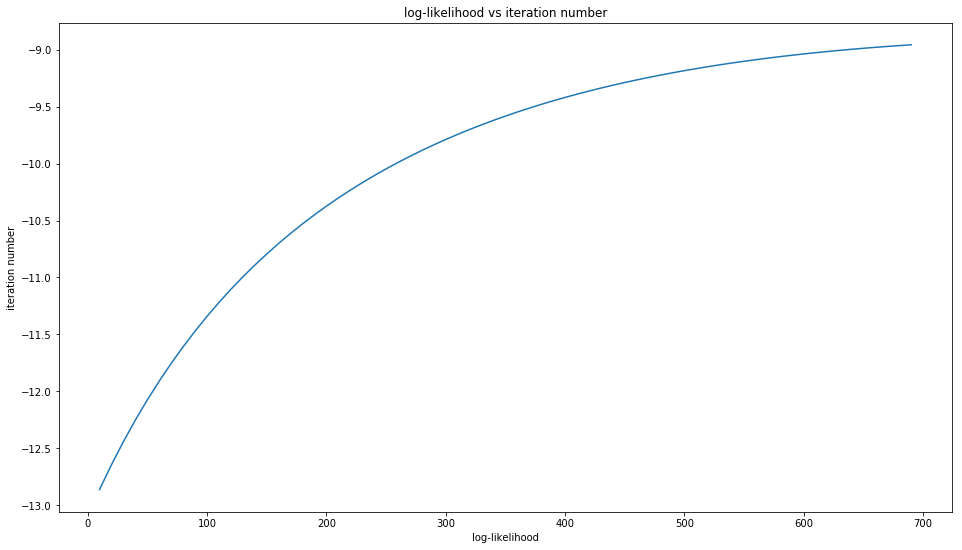

In [12]:
train_X_N,train_Y_N,valid_X_N,valid_Y_N=read_file('Gisette\gisette')
para,L_coll=update_parameters(train_X_N,train_Y_N,1000,0.3,lambd)
_,corr_rate=prediction(para,train_X_N,train_Y_N)
_,pred_rate=prediction(para,valid_X_N,valid_Y_N)
print(pd.Series([corr_rate,pred_rate],index=['training_err','prediction_err']))
plot_result(L_coll)

###  MADELON

training_err      0.271000
prediction_err    0.411667
dtype: float64


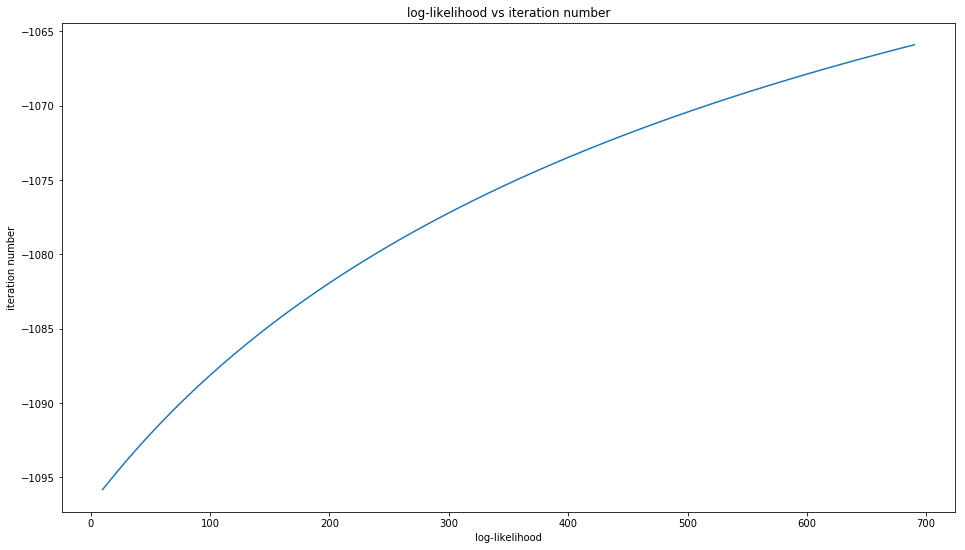

In [13]:
train_X_N,train_Y_N,valid_X_N,valid_Y_N=read_file('MADELON\madelon')
para,L_coll=update_parameters(train_X_N,train_Y_N,1000,0.03,lambd)
_,corr_rate=prediction(para,train_X_N,train_Y_N)
_,pred_rate=prediction(para,valid_X_N,valid_Y_N)
print(pd.Series([corr_rate,pred_rate],index=['training_err','prediction_err']))
plt.figure(figsize=(16,9))  
plot_result(L_coll)

### Arcene

training_err      0.00
prediction_err    0.17
dtype: float64


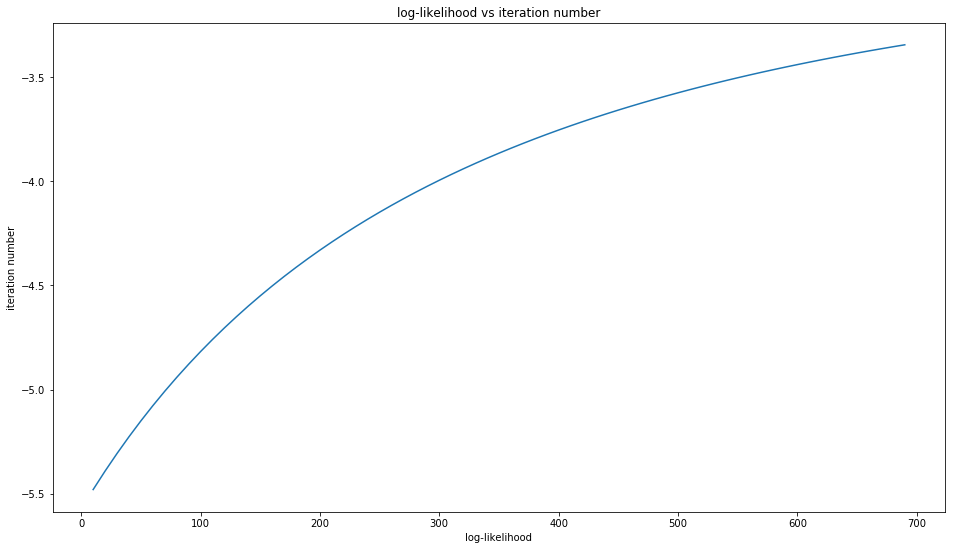

In [14]:
train_X_N,train_Y_N,valid_X_N,valid_Y_N=read_file('arcene/arcene')
para,L_coll=update_parameters(train_X_N,train_Y_N,1000,0.5,lambd)
_,corr_rate=prediction(para,train_X_N,train_Y_N)
_,pred_rate=prediction(para,valid_X_N,valid_Y_N)
print(pd.Series([corr_rate,pred_rate],index=['training_err','prediction_err']))
plt.figure(figsize=(16,9))  
plot_result(L_coll)